In [1]:
import os
print(os.getcwd())
! pip install -r requirements.txt

c:\Users\ThinkPad\Desktop\code\Tradeking\examples


In [2]:
import warnings
warnings.filterwarnings("ignore")
import os
from finrl import config
from finrl import config_tickers
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime
%matplotlib inline
from finrl.config_tickers import DOW_30_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent

# from pprint import pprint

# import itertools

if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR )
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

In [3]:
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2019-01-01'
TRADE_START_DATE = '2019-01-01'
TRADE_END_DATE = '2020-01-01'
df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
USE_TURBULENCE=False
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    use_turbulence=USE_TURBULENCE,
                    user_defined_feature = False)

df = fe.preprocess_data(df)
# df.to_csv('df.csv')
df

Successfully added technical indicators


,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2009-01-02,3.067143,3.251429,3.041429,2.762747,746015200,AAPL,4,0.000000,2.985942,2.656151,100.000000,66.666667,100.000000,2.762747,2.762747
2768,2009-01-02,58.590000,59.080002,57.750000,44.219177,6547900,AMGN,4,0.000000,2.985942,2.656151,100.000000,66.666667,100.000000,44.219177,44.219177
5536,2009-01-02,18.570000,19.520000,18.400000,15.365304,10955700,AXP,4,0.000000,2.985942,2.656151,100.000000,66.666667,100.000000,15.365304,15.365304
8304,2009-01-02,42.799999,45.560001,42.779999,33.941101,7010200,BA,4,0.000000,2.985942,2.656151,100.000000,66.666667,100.000000,33.941101,33.941101
11072,2009-01-02,44.910000,46.980000,44.709999,31.579336,7117200,CAT,4,0.000000,2.985942,2.656151,100.000000,66.666667,100.000000,31.579336,31.579336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69199,2019-12-31,293.660004,294.089996,291.149994,281.603668,2224200,UNH,1,6.923088,289.544178,261.587752,68.469983,81.213321,38.929012,272.148235,252.772244
71967,2019-12-31,187.059998,188.000000,186.539993,184.216858,5273000,V,1,2.034561,186.964312,175.945804,58.615971,96.620777,12.589647,180.370406,176.955478
74735,2019-12-31,61.209999,61.400002,60.939999,52.529831,8466700,VZ,1,0.280621,52.991407,51.601139,56.217602,58.966808,8.866464,51.899305,51.638005
77503,2019-12-31,58.820000,59.470001,58.810001,51.983814,3305100,WBA,1,0.000957,52.558163,50.436090,54.048372,-6.349832,16.194864,52.118710,50.890457


In [5]:
df.reset_index(drop=True)

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2009-01-02,3.067143,3.251429,3.041429,2.762747,746015200,AAPL,4,0.000000,2.985942,2.656151,100.000000,66.666667,100.000000,2.762747,2.762747
1,2009-01-02,58.590000,59.080002,57.750000,44.219177,6547900,AMGN,4,0.000000,2.985942,2.656151,100.000000,66.666667,100.000000,44.219177,44.219177
2,2009-01-02,18.570000,19.520000,18.400000,15.365304,10955700,AXP,4,0.000000,2.985942,2.656151,100.000000,66.666667,100.000000,15.365304,15.365304
3,2009-01-02,42.799999,45.560001,42.779999,33.941101,7010200,BA,4,0.000000,2.985942,2.656151,100.000000,66.666667,100.000000,33.941101,33.941101
4,2009-01-02,44.910000,46.980000,44.709999,31.579336,7117200,CAT,4,0.000000,2.985942,2.656151,100.000000,66.666667,100.000000,31.579336,31.579336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80267,2019-12-31,293.660004,294.089996,291.149994,281.603668,2224200,UNH,1,6.923088,289.544178,261.587752,68.469983,81.213321,38.929012,272.148235,252.772244
80268,2019-12-31,187.059998,188.000000,186.539993,184.216858,5273000,V,1,2.034561,186.964312,175.945804,58.615971,96.620777,12.589647,180.370406,176.955478
80269,2019-12-31,61.209999,61.400002,60.939999,52.529831,8466700,VZ,1,0.280621,52.991407,51.601139,56.217602,58.966808,8.866464,51.899305,51.638005
80270,2019-12-31,58.820000,59.470001,58.810001,51.983814,3305100,WBA,1,0.000957,52.558163,50.436090,54.048372,-6.349832,16.194864,52.118710,50.890457


## Add covariance matrix as states

In [6]:
# add covariance matrix as states
df=df.sort_values(['date','tic'],ignore_index=True)
df.index = df.date.factorize()[0]

cov_list = []
return_list = []

# look back is one year
lookback=252
for i in range(lookback,len(df.index.unique())):
  data_lookback = df.loc[i-lookback:i,:]
  price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'close')
  return_lookback = price_lookback.pct_change().dropna()
  return_list.append(return_lookback)

  covs = return_lookback.cov().values 
  cov_list.append(covs)


df_cov = pd.DataFrame({'date':df.date.unique()[lookback:],'cov_list':cov_list,'return_list':return_list})
df = df.merge(df_cov, on='date')
df = df.sort_values(['date','tic']).reset_index(drop=True)

In [7]:
train = data_split(df, TRAIN_START_DATE,TRAIN_END_DATE)
train

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,cov_list,return_list
0,2010-01-04,7.622500,7.660714,7.585000,6.515213,493729600,AAPL,0,0.119533,6.579439,5.602008,62.133197,168.776027,33.760635,6.095244,6.041847,"[[0.0004430596652681933, 0.0001369795300223627...",tic AAPL AMGN AXP ...
0,2010-01-04,56.630001,57.869999,56.560001,43.267181,5277400,AMGN,0,0.241636,43.729695,41.098565,52.850003,86.336643,6.350919,42.407385,42.327303,"[[0.0004430596652681933, 0.0001369795300223627...",tic AAPL AMGN AXP ...
0,2010-01-04,40.810001,41.099998,40.389999,33.675968,6894300,AXP,0,0.296128,34.621850,32.256876,56.779367,1.131431,11.537387,33.560477,31.938128,"[[0.0004430596652681933, 0.0001369795300223627...",tic AAPL AMGN AXP ...
0,2010-01-04,55.720001,56.389999,54.799999,43.777531,6186700,BA,0,0.501039,44.009580,41.898204,58.804990,81.205096,10.840906,42.319075,40.752999,"[[0.0004430596652681933, 0.0001369795300223627...",tic AAPL AMGN AXP ...
0,2010-01-04,57.650002,59.189999,57.509998,41.156906,7325600,CAT,0,0.078141,41.566972,39.603873,55.292713,49.520368,8.534279,40.750144,40.360936,"[[0.0004430596652681933, 0.0001369795300223627...",tic AAPL AMGN AXP ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,2018-12-31,248.059998,250.279999,246.940002,234.663681,3123200,UNH,0,-6.333748,274.174634,215.045315,44.568386,-82.571555,22.914262,247.160596,248.017312,"[[0.000326974680941365, 0.00012732622052929416...",tic AAPL AMGN AXP ...
2263,2018-12-31,131.679993,132.440002,130.229996,128.529007,7976000,V,0,-2.392563,141.962481,119.481180,46.509181,-59.824604,15.829088,131.626487,133.844241,"[[0.000326974680941365, 0.00012732622052929416...",tic AAPL AMGN AXP ...
2263,2018-12-31,55.529999,56.230000,55.070000,46.145004,15331800,VZ,0,-0.657140,49.361319,43.587793,49.637826,-70.971155,14.948583,47.303147,46.653788,"[[0.000326974680941365, 0.00012732622052929416...",tic AAPL AMGN AXP ...
2263,2018-12-31,68.540001,68.720001,67.739998,58.403545,4870900,WBA,0,-3.067528,77.053680,53.152092,38.307228,-124.388610,57.411928,66.815760,66.317000,"[[0.000326974680941365, 0.00012732622052929416...",tic AAPL AMGN AXP ...



## Environment for Portfolio Allocation


In [8]:
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv # for parallel computing


class StockPortfolioEnv(gym.Env):
    """A portfolio allocation environment for OpenAI gym

    Attributes
    ----------
        df: DataFrame
            input data
        stock_dim : int
            number of unique stocks
        hmax : int
            maximum number of shares to trade
        initial_amount : int
            start money
        transaction_cost_pct: float
            transaction cost percentage per trade
        reward_scaling: float
            scaling factor for reward, good for training
        state_space: int
            the dimension of input features
        action_space: int
            equals stock dimension
        tech_indicator_list: list
            a list of technical indicator names
        turbulence_threshold: int
            a threshold to control risk aversion
        day: int
            an increment number to control date

    Methods
    -------
    _sell_stock()
        perform sell action based on the sign of the action
    _buy_stock()
        perform buy action based on the sign of the action
    step()
        at each step the agent will return actions, then 
        we will calculate the reward, and return the next observation.
    reset()
        reset the environment
    render()
        use render to return other functions
    save_asset_memory()
        return account value at each time step
    save_action_memory()
        return actions/positions at each time step
        

    """
    metadata = {'render.modes': ['human']}

    def __init__(self, 
                df,
                stock_dim,
                hmax,
                initial_amount,
                transaction_cost_pct,
                reward_scaling,
                state_space,
                action_space,
                tech_indicator_list,
                turbulence_threshold=None,
                lookback=252,
                day = 0):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.lookback=lookback
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.transaction_cost_pct =transaction_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list

        # action_space normalization and shape is self.stock_dim
        self.action_space = spaces.Box(low = 0, high = 1,shape = (self.action_space,)) 
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape = (self.state_space+len(self.tech_indicator_list),self.state_space))

        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        # self.state = [self.data[tech].values.tolist() for tech in self.tech_indicator_list]

        self.terminal = False     
        self.turbulence_threshold = turbulence_threshold        
        # initalize state: inital portfolio return + individual stock return + individual weights
        self.portfolio_value = self.initial_amount

        # memorize portfolio value each step
        self.asset_memory = [self.initial_amount]
        # memorize portfolio return each step
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim] # equally allocated at initial state
        self.date_memory=[self.data.date.unique()[0]]

        
    def step(self, actions):
        self.terminal = self.day >= len(self.df.index.unique())-1

        if self.terminal:
            df = pd.DataFrame(self.portfolio_return_memory)
            df.columns = ['daily_return']
            plt.plot(df.daily_return.cumsum(),'r')
            plt.savefig('results/cumulative_reward.png')
            plt.close()
            
            plt.plot(self.portfolio_return_memory,'r')
            plt.savefig('results/rewards.png')
            plt.close()

            print("=================================")
            print("begin_total_asset:{}".format(self.asset_memory[0]))           
            print("end_total_asset:{}".format(self.portfolio_value))

            df_daily_return = pd.DataFrame(self.portfolio_return_memory)
            df_daily_return.columns = ['daily_return']
            if df_daily_return['daily_return'].std() !=0:
              sharpe = (252**0.5)*df_daily_return['daily_return'].mean()/ \
                       df_daily_return['daily_return'].std()
              print("Sharpe: ",sharpe)
            print("=================================")
            
            # if turbulence>self.turbulence_threshold
            return self.state, self.reward, self.terminal,{}

        else:
            weights = self.softmax_normalization(actions) 
            self.actions_memory.append(weights)
            last_day_memory = self.data

            #load next state
            self.day += 1
            self.data = self.df.loc[self.day,:]
            self.covs = self.data['cov_list'].values[0]
            self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
            # self.state = [self.data[tech].values.tolist() for tech in self.tech_indicator_list ]
        
            portfolio_return = sum(((self.data.close.values / last_day_memory.close.values)-1)*weights)
            # log_portfolio_return = np.log(sum((self.data.close.values / last_day_memory.close.values)*weights))
            # update portfolio value
            new_portfolio_value = self.portfolio_value*(1+portfolio_return)
            self.portfolio_value = new_portfolio_value

            # save into memory
            self.portfolio_return_memory.append(portfolio_return)
            self.date_memory.append(self.data.date.unique()[0])            
            self.asset_memory.append(new_portfolio_value)

            # the reward is the new portfolio value or end portfolo value
            self.reward = new_portfolio_value/(1+portfolio_return)
            

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [self.initial_amount]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        # load states
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        # self.state = [self.data[tech].values.tolist() for tech in self.tech_indicator_list]
        self.portfolio_value = self.initial_amount
        #self.cost = 0
        #self.trades = 0
        self.terminal = False 
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]
        self.date_memory=[self.data.date.unique()[0]] 
        return self.state
    
    def render(self, mode='human'):
        return self.state
        
    def softmax_normalization(self, actions):
        numerator = np.exp(actions)
        denominator = np.sum(np.exp(actions))
        softmax_output = numerator/denominator
        return softmax_output

    
    def save_asset_memory(self):       # for test
        date_list = self.date_memory
        portfolio_return = self.portfolio_return_memory
        #print(len(date_list))
        #print(len(asset_list))
        df_account_value = pd.DataFrame({'date':date_list,'daily_return':portfolio_return})
        return df_account_value

    def save_action_memory(self):      # for test
        # date and close price length must match actions length
        date_list = self.date_memory
        df_date = pd.DataFrame(date_list)
        df_date.columns = ['date']
        
        action_list = self.actions_memory
        df_actions = pd.DataFrame(action_list)
        df_actions.columns = self.data.tic.values
        df_actions.index = df_date.date
        #df_actions = pd.DataFrame({'date':date_list,'actions':action_list})
        return df_actions

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        return e, obs

In [9]:
stock_dimension = len(train.tic.unique())
state_space = stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")
tech_indicator_list = ['macd', 'rsi_30', 'cci_30', 'dx_30']
feature_dimension = len(tech_indicator_list)
print(f"Feature Dimension: {feature_dimension}")

Stock Dimension: 29, State Space: 29
Feature Dimension: 4


In [1]:
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "transaction_cost_pct": 0, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": tech_indicator_list, 
    "action_space": stock_dimension, 
    "reward_scaling": 1e-1
}

e_train_gym = StockPortfolioEnv(df = train, **env_kwargs)

NameError: name 'state_space' is not defined

In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


### Model 1: **A2C**


In [ ]:
agent = DRLAgent(env = env_train)

A2C_PARAMS = {"n_steps": 10, "ent_coef": 0.005, "learning_rate": 0.0004}
model_a2c = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS)

{'n_steps': 10, 'ent_coef': 0.005, 'learning_rate': 0.0004}
Using cpu device


In [ ]:
trained_a2c = agent.train_model(model=model_a2c, tb_log_name='a2c',
                                total_timesteps=1000)

-------------------------------------
| time/                 |           |
|    fps                | 129       |
|    iterations         | 100       |
|    time_elapsed       | 7         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -39.6     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0004    |
|    n_updates          | 99        |
|    policy_loss        | 4.41e+08  |
|    reward             | 2123612.8 |
|    std                | 0.995     |
|    value_loss         | 1.54e+14  |
-------------------------------------


### Model 2: **PPO**


In [ ]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "learning_rate": 0.001,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.001, 'batch_size': 128}
Using cpu device


In [ ]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=1)

----------------------------------
| time/              |           |
|    fps             | 158       |
|    iterations      | 1         |
|    time_elapsed    | 12        |
|    total_timesteps | 2048      |
| train/             |           |
|    reward          | 4631272.5 |
----------------------------------


In [ ]:
agent = DRLAgent(env = env_train)
DDPG_PARAMS = {
    "buffer_size": 10_000,
    "learning_rate": 0.0005,
    "batch_size": 64
}
model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)

{'buffer_size': 10000, 'learning_rate': 0.0005, 'batch_size': 64}
Using cpu device


In [ ]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=1)

begin_total_asset:1000000
end_total_asset:5194854.490328573
Sharpe:  1.2344326353068307


## Back-Testing
Assume that we have $1,000,000 initial capital at 2020-01-01. We use the PPO, A2C, SVM, Linear Regression, Decision Tree, Random Foreset models to trade Dow jones 30 constituent stocks.


In [ ]:
trade = data_split(df,TRADE_START_DATE, TRADE_END_DATE)
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)

In [ ]:
import torch
unique_tic = trade.tic.unique()
unique_trade_date = trade.date.unique()

In [ ]:
%matplotlib inline
from finrl.plot import get_baseline
from copy import deepcopy

def get_daily_return(df, value_col_name="account_value"):
    df = deepcopy(df)
    df["daily_return"] = df[value_col_name].pct_change(1)
    df["date"] = pd.to_datetime(df["date"])
    return pd.DataFrame(df[['date','daily_return']])

baseline_df = get_baseline(
        ticker="^DJI", 
        start = TRADE_START_DATE,
        end =  TRADE_END_DATE)

baseline_returns = get_daily_return(baseline_df, value_col_name="close")
baseline_returns['daily_return'][0]=0.000000
dji_cumpod =(baseline_returns['daily_return']+1).cumprod()-1
print('*'*100, dji_cumpod)

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (1008, 8)
**************************************************************************************************** 0       0.000000
1       0.003975
2       0.010116
3       0.019008
4       0.018490
          ...   
1003    0.462390
1004    0.466250
1005    0.469893
1006    0.466245
1007    0.463837
Name: daily_return, Length: 1008, dtype: float64


In [ ]:
df_daily_return_a2c, df_actions_a2c = DRLAgent.DRL_prediction(model=trained_a2c,
                        environment = e_trade_gym)
df_daily_return_ppo, df_actions_ppo = DRLAgent.DRL_prediction(model=trained_ppo,
                        environment = e_trade_gym)
df_daily_return_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(model=trained_ddpg,
                        environment = e_trade_gym)
print(df_daily_return_a2c,df_daily_return_ppo,df_daily_return_ddpg)
time_ind = pd.Series(df_daily_return_a2c.date)

begin_total_asset:1000000
end_total_asset:1777835.3854136718
Sharpe:  0.7840045676770916
hit end!
begin_total_asset:1000000
end_total_asset:1764739.5747874447
Sharpe:  0.7720560470262736
hit end!
begin_total_asset:1000000
end_total_asset:1717634.3547938738
Sharpe:  0.7526448823544218
hit end!
            date  daily_return
0     2018-01-02      0.000000
1     2018-01-03      0.001904
2     2018-01-04      0.004088
3     2018-01-05      0.006757
4     2018-01-08      0.000603
...          ...           ...
1003  2021-12-27      0.009351
1004  2021-12-28      0.003026
1005  2021-12-29      0.002271
1006  2021-12-30     -0.002201
1007  2021-12-31     -0.001357

[1008 rows x 2 columns]             date  daily_return
0     2018-01-02      0.000000
1     2018-01-03      0.001936
2     2018-01-04      0.004048
3     2018-01-05      0.006862
4     2018-01-08      0.000641
...          ...           ...
1003  2021-12-27      0.009284
1004  2021-12-28      0.003011
1005  2021-12-29      0.002364

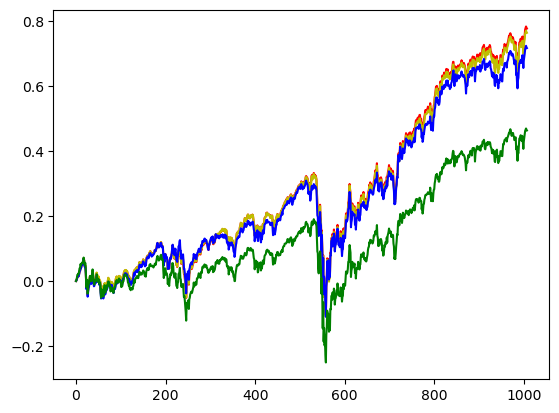

In [ ]:
a2c_cumpod =(df_daily_return_a2c.daily_return+1).cumprod()-1
ppo_cumpod =(df_daily_return_ppo.daily_return+1).cumprod()-1
ddpg_cumpod =(df_daily_return_ddpg.daily_return+1).cumprod()-1

path = './results/csv'
if not os.path.isdir(path):
    os.mkdir(path)
if USE_TURBULENCE:
    a2c_cumpod.to_csv(os.path.join(path,'a2c_tur.csv'))
    ppo_cumpod.to_csv(os.path.join(path,'ppo_tur.csv'))
    ddpg_cumpod.to_csv(os.path.join(path,'ddpg_tur.csv'))
    dji_cumpod.to_csv(os.path.join(path,'dji.csv'))
else:
    a2c_cumpod.to_csv(os.path.join(path,'a2c_no_tur.csv'))
    ppo_cumpod.to_csv(os.path.join(path,'ppo_no_tur.csv'))
    ddpg_cumpod.to_csv(os.path.join(path,'ddpg_no_tur.csv'))
    dji_cumpod.to_csv(os.path.join(path,'dji.csv'))


plt.plot(a2c_cumpod,'r')
plt.plot(ppo_cumpod,'y')
plt.plot(ddpg_cumpod,'b')
plt.plot(dji_cumpod,'g')

In [ ]:
(pd.Series([1,2,3,4])).cumprod()

0     1
1     2
2     6
3    24
dtype: int64